# TUTORIAL 3 : Evolute of curves

The evolute of a curve is by definition the set of its centers of curvatures. The goal of this lab session is to define a generic function that computes the evolute of any parameterized curve. 

## PART I. 
We assume in the following that we have a parametrized curve $f:[a,b]\to\mathbb{R}^3$ which is only known through a discretization $(t,f)$ where $$\textit{t = np.linspace(0,1,n)}\quad f=(f(t_0),\cdots,f(t_{n-1})).$$
$f$ is therefore of size $3 \times n$.

## 1) Discrete derivative
Define a function that calculate an approximation of the derivative of $f$. The output has the same size than $t$ and $f$. 

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math as mth
#----------------------
# discrete derivature
def derivative(t,f):
    # TO BE DONE
    n=len(t)
    df=np.ones((3,n))
    #a=t[0]
    #b=t[n]
    #h=b-a
    #x=(t-a)/(b-a)
    h=t[1]-t[0]
    for i in range(n-1):
            df[:,i]=(f[:,i+1]-f[:,i])/h
    df[:,n-1] = df[:,n-2]
    return df
 



#---------------------
# check that function on simple examples
t=np.linspace(0,2*np.pi,50)
f1 = np.sin(t)
f2 = np.cos(t)
f3 = 3*t

f = np.array([f1,f2,f3])
g = derivative(t,f)
print(g)




[[ 0.99726184  0.98088683  0.94840568  0.90035174  0.83751405  0.7609244
   0.67184039  0.57172478  0.46222147  0.34512849  0.22236852  0.09595725
  -0.03202962 -0.15949058 -0.2843327  -0.40450608 -0.51803749 -0.62306273
  -0.71785731 -0.80086468 -0.87072188 -0.92628185 -0.9666323  -0.99111067
  -0.99931504 -0.99111067 -0.9666323  -0.92628185 -0.87072188 -0.80086468
  -0.71785731 -0.62306273 -0.51803749 -0.40450608 -0.2843327  -0.15949058
  -0.03202962  0.09595725  0.22236852  0.34512849  0.46222147  0.57172478
   0.67184039  0.7609244   0.83751405  0.90035174  0.94840568  0.98088683
   0.99726184  0.99726184]
 [-0.06402633 -0.19102769 -0.31489238 -0.43358654 -0.54516123 -0.64778438
  -0.73977093 -0.81961047 -0.88599202 -0.93782561 -0.97426012 -0.99469732
  -0.99880161 -0.9865056  -0.9580112  -0.91378628 -0.85455702 -0.78129596
  -0.69520603 -0.59770085 -0.49038143 -0.37500996 -0.25348084 -0.12778957
   0.          0.12778957  0.25348084  0.37500996  0.49038143  0.59770085
   0.6952060

## 2) Discrete normal vector
The goal is to build the function that outputs for every $t_i$ the unit normal $N(t_i)$.

In [9]:
#----------------------
# discrete derivature
def normal_vector(t,f):
    # TO BE DONE
    n=len(t)
    normal_f=np.empty([3,n])#intialization of the normal vector
    tangent=np.empty([3,n])#intialization of the tangent vector
    deriv_f=np.empty([3,n])#intialization of derivative of f
    deriv_f=derivative(t,f)
    norm=0
    for i in range (n):
        norm=mth.sqrt(deriv_f[0,i]**2+deriv_f[1,i]**2+deriv_f[2,i]**2)
        tangent[0,i]=deriv_f[0,i]/norm
        tangent[1,i]=deriv_f[1,i]/norm
        tangent[2,i]=deriv_f[2,i]/norm
    tang_deriv=np.empty([3,n])
    tang_deriv=derivative(t,tangent)
    tang_deriv[0,n-1]=tang_deriv[0,n-2]
    tang_deriv[1,n-1]=tang_deriv[1,n-2]
    tang_deriv[2,n-1]=tang_deriv[2,n-2]
    for i in range (n):
        norm=mth.sqrt(tang_deriv[0,i]**2+tang_deriv[1,i]**2+tang_deriv[2,i]**2)
        normal_f[0,i]=tang_deriv[0,i]/norm
        normal_f[1,i]=tang_deriv[1,i]/norm
        normal_f[2,i]=tang_deriv[2,i]/norm
      
       
    return normal_f # normal_f is of size 3 x n


## 3) Curvature function
The goal is to build the function that outputs for every $t_i$ the curvature $k(t_i)$.

In [10]:
#----------------------
# discrete derivature
import numpy.linalg as l
        
def curvature(t,f):
    # TO BE DONE
    curvature_f=np.array(len(t))
    f_p=derivative(t,f)
    f_sec=derivative(t,f_p)
    crossf=np.empty((3,len(t)))
    for i in range(len(t)):
        crossf[:,i]=np.cross(f_p[:,i],f_sec[:,i])
    
    curvature_f=np.empty(len(t))
    for j in range(len(t)):
        curvature_f[j]=l.norm(crossf[:,j])/((l.norm(f_p[:,j]))**3)
        
    
        
    return curvature_f # curvature_f is of size 1 x n

#---------------------
# check that function on simple examples
t=np.linspace(0,2*np.pi,100)
f1 = np.sin(t)
f2 = np.cos(t)
f3 = 3*t

f = np.array([f1,f2,f3])
K = curvature(t,f)
print(K)                                        


[0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476
 0.09996476 0.09996476 0.09996476 0.09996476 0.09996476 0.0999

## 4) Evolute 
Define the evolute, namely the set of centers of curvatures. 

In [11]:
#----------------------
# discrete derivature
def evolute(t,f):
    # TO BE DONE
    evolute_f=np.empty((3,len(t)))
    
    Curvaturef=curvature(t,f)
    Normal=normal_vector(t,f)
    for i in range(len(t)-1):
        evolute_f[:,i]=f[:,i] + Normal[:,i]/Curvaturef[i]
    return evolute_f # evolute_f is of size 3 x n

t=np.linspace(0,2*np.pi,100)
f1 = np.sin(t)
f2 = np.cos(t)
f3 = 3*t

f = np.array([f1,f2,f3])
E = evolute(t,f)
print(E)


[[-6.34462764e-01 -1.20294685e+00 -1.76658710e+00 -2.32311392e+00
  -2.87028638e+00 -3.40590121e+00 -3.92780168e+00 -4.43388628e+00
  -4.92211718e+00 -5.39052846e+00 -5.83723398e+00 -6.26043502e+00
  -6.65842749e+00 -7.02960883e+00 -7.37248442e+00 -7.68567361e+00
  -7.96791531e+00 -8.21807302e+00 -8.43513946e+00 -8.61824056e+00
  -8.76663905e+00 -8.87973739e+00 -8.95708015e+00 -8.99835591e+00
  -9.00339847e+00 -8.97218752e+00 -8.90484874e+00 -8.80165328e+00
  -8.66301666e+00 -8.48949713e+00 -8.28179340e+00 -8.04074181e+00
  -7.76731298e+00 -7.46260793e+00 -7.12785359e+00 -6.76439790e+00
  -6.37370437e+00 -5.95734618e+00 -5.51699986e+00 -5.05443853e+00
  -4.57152475e+00 -4.07020306e+00 -3.55249210e+00 -3.02047651e+00
  -2.47629853e+00 -1.92214936e+00 -1.36026038e+00 -7.92894107e-01
  -2.22335132e-01  3.49119109e-01  9.19167570e-01  1.48551487e+00
   2.04588052e+00  2.59800814e+00  3.13967449e+00  3.66869848e+00
   4.18294992e+00  4.68035809e+00  5.15892012e+00  5.61670899e+00
   6.05188

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


## PART II. 1) Evolute of the helicoid
Plot the evolute of the helicoid 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^3\\ 
&t &\mapsto & (R\cos t, R \sin t, at).
\end{array}
$$

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


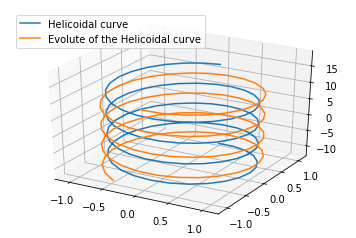

In [12]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
t = np.linspace(-4 * np.pi, 4 * np.pi, 100)
f1 = np.sin(t)
f2 = np.cos(t)
f3 = t

f = np.array([f1,f2,f3])
e = evolute(t,f)
x1 = e[0,:]
y1 = e[1,:]
z1 = e[2,:]


ax.plot(f1, f2, f3, label='Helicoidal curve')
ax.plot(x1, y1, z1,label='Evolute of the Helicoidal curve')
ax.legend()

plt.show()

## 2) Evolute of the catenary
Plot the evolute of the catenary 
$$
\begin{array}{lllll}
\gamma :&\mathbb{R}&\to&\mathbb{R}^2\\ 
&t &\mapsto & (t,\cosh t).
\end{array}
$$

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars
/usr/lib/python3/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in double_scalars


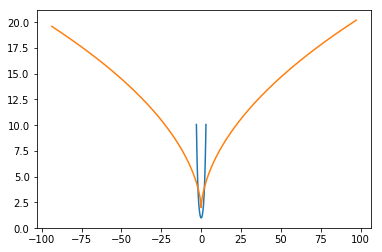

In [18]:
import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(-1,3,500)

x = t
y = np.cosh(t)
z = 0*t

Ca = np.array([x,y,z])
Ec = evolute(t,Ca)

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
#ax = fig.gca(projection='3d')



C1 = Ec[0,:]
C2 = Ec[1,:]
C3 = Ec[2,:]

#ax.plot(x, y, z, label='parametric curve')
#ax.plot(C1, C2, C3,label='parametric curve')
#ax.legend()
plt.plot(x,y,label='catenary curve')
plt.plot(C1,C2,label='evolute of the catenary curve')
plt.show()

## 3) Evolute of Bezier curves
Plot the evolute of  Bezier curve that you created before.